### Определение закономерностей успешности компьютерной игры

Цель: Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


### Вывод

- Необходимо приобретать игры только для следующих платформ: PS4 (около 50% продаж), PC, XOne и 3DS (по 15% продаж), PSV (6% продаж).
- Жанры для продажи целесообразно приобретать следующие: action, shooter (первые 2 жанра закрывают 50% продаж), sports, role-playing (вторые 2 жанра 30%) и platform (около 4%).
- Есть связь между рейтингом от организации ESRB и продажами. Самыми продаваемыми играми стали те, у которых рейтинг «M» («Mature») — «Для взрослых», «E» («Everyone») — «Для всех», «T» («Teen») — «Подросткам» и «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».
- При закупе игр не нужно опираться на отзывы критиков, особенно покупателей. Корреляция между продажами и отзывами критиков достаточно слабая, а между продажами и отзывами пользователей практически отсутствует.
- Продолжительность жизни игровых платформ - от 8 до 10 лет. Обратим внимание, что на конец 2016 года нет платформ, по которым бы наблюдался рост продаж. Это даёт возможность предположить, что в скором времени ожидается выход новой платформы и при формировании бюджетов на грядущий год стоит принять это во внимание и заложить резервные фонды.


### Ключевые понятия

Matplotlib, NumPy, Pandas, Python, исследовательский анализ данных, описательная статистика, предобработка данных,
проверка статистических гипотез


### Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


1. [Откроем файл с данными и изучим общую информацию](#step1)


2. [Подготовим данные](#step2)


- заменим названия столбцов (приведем к нижнему регистру);
- преобразуем данные в нужные типы;
- обработаем пропуски при необходимости;
- посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.


3. [Проведем исследовательский анализ данных](#step3)


- посмотрим сколько игр выпускалось в разные годы.
- посмотрим, как менялись продажи по платформам. 
- возьмём данные за соответствующий актуальный период.
- определим потенциально прибыльные платформы.
- построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 
- посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
- посмотрим на общее распределение игр по жанрам. 


4. [Составим портрет пользователя каждого региона](#step4)


Определим для пользователя каждого региона (NA, EU, JP):

- самые популярные платформы (топ-5). 
- самые популярные жанры (топ-5). 


5. [Проверим гипотезы](#step5)


- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action и Sports разные.


6. [Напишем общий вывод](#step6)

### Откроем файл с данными и изучим общую информацию <a id="step1"></a>   

In [1]:
# импортируем библиотеки, которые потребуются нам для работы
import pandas as pd
from IPython.display import display
import math
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
games = pd.read_csv('/home/ilya/Desktop/Datasets/games.csv')
games.info()
games.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
games.describe()
# с помощью метода describe() посмотрим какие отклонения есть в данных

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Названия колонок с заглавной буквы. Во втором шаге *приведём всё к нижнему регистру* методом str.lower().

Тип данных в столбце Year_of_Release вещественный. *Приведём его к целочисленным* методом int().

Тип данных в столбце User_Score строковый. *Приведём его к числовым значениям* методом to_numeric().

Всего в таблице 16715 строк. 

*В столбце Name 2 пропуска.* Изучим их во втором шаге, если пропуски по всем 2-м строкам, то удалим их.

*В столбце Year_of_Release 269 пропусков.* Как восстановить информацию о годе выхода игры? Чтобы не терять данные, можно поискать информацию в интернете, но насколько она будет достоверной... Пропуски в данном столбце составляют всего 1,6%. Оценим трудозатраты и примем решение во втором шаге.

*В столбце Genre как и в столбце Name 2 пропуска.* Можем предположить, что пропуски допущены в одних и тех же строках. Проверим предположение во стором шаге.

*В столбце Critic_Score пропусков более 50%.* Просто удалить их будет неверно, так как это явно одна из тех характеристик, которая влияет на успешность игры. Оценки не завися т на 100% ни от жанра, ни от выручки. Если проведём замену пропущенных значений исходя из выручки, то возможно мы исказим все данные. В связи с этим пропуски оставим и будем проводить анализ на базе существующих значений.

*В столбце User_Score пропусков около 40%.* Удалить их мы не можем, так как одна одна из ключевых характеристик. С ними поступим по аналогии как и со столбцом Critic_Score.

*В столбце Rating пропусков также около 40%.* Этот столбец показывает для какой возрастной группы предназначена игра. Удалять их мы не будем, так как потеряем большое количество данных. Вероятнее всего возрастная категория зависит от жанра, но заполнять на базе этого пропуски в столбце сомнительно. Оставим как есть.

Отрицательных значений в столбцах нет. 

Из внешних источников узнали значения столбца Rating:
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»

### Подготовка данных к анализу <a id="step2"></a>   

In [4]:
# приведем наименование столбцов к нижнему регисту
games.columns = games.columns.str.lower()
# проверим успешно ли прошла замена
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Прежде чем менять тип данных в столбце year_of_release, необходимо обработать пропуски. Так как при наличии NA значений в столбце, замена типа данных не произойдет. Пэтому сначала отработаем с пропусками, а потом поменяем тип данных.

Количество пропущенных строк в столбцах 'name' и 'genre' одинаково. Это свидетельствует о том, что пропуски допущены в одних и тех же местах. Проверим данное предположение.

In [5]:
len(games[(games['name'].isna()==True) & (games['genre'].isna()==True)])

2

Восполнить информацию о названии и игры и её жанре не представляется возможным, поэтому удалим эти 2 строки. Влияния на датафрейм, состоящий из 16715 строк, это не окажет. Удаление строк произведем с помощью метода dropna().

In [6]:
games.dropna(subset=['name', 'genre'], inplace=True)
# убедимся что замена прошла успешно
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Предположим, что одни и те же игры выходят для разных платформ. Сгруппируем таблицу по названию игры, посмотрим в какие годы она выходила для разных платформ и заполним данные по этому принципу. Воспользуемся мажоритарной системой: если для двух платформ игра вышла в 2011, а для одной в 2014, то пропуск заполним той датой, которая чаще встречается.

In [7]:
games_name = games.query('name == "SimCity 2000"')
display(games_name)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
769,SimCity 2000,PC,1992.0,Simulation,1.20,0.84,0.00,0.10,NaN,NaN,NaN
1646,SimCity 2000,PS,1996.0,Simulation,0.68,0.46,0.00,0.08,NaN,NaN,NaN
4066,SimCity 2000,SNES,1995.0,Simulation,0.00,0.00,0.49,0.00,NaN,NaN,NaN
6219,SimCity 2000,SAT,1994.0,Simulation,0.00,0.00,0.28,0.00,NaN,NaN,NaN
10408,SimCity 2000,GBA,2003.0,Simulation,0.08,0.03,0.00,0.00,62.0,7.8,E


На примере игры SimCity 2000 мы видим, что наше предположение оказалось несостоятельным. Мы рискуем заполнить пропуски недостоверными данными. Так как пропуски в данном столбце составляют лишь 1,6% удалим их.

In [8]:
games.dropna(subset=['year_of_release'], inplace=True)

In [9]:
# изменим вещественный тип данных столбца с годом релиза на целочисленный
games['year_of_release'] = games['year_of_release'].astype(int)
# убедимся что замена прошла успешно
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [10]:
games_nan = games.query('critic_score == "NaN"')
display(games_nan)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Причины, которые могли привести к пропускам.**

В столбцах Name и Genre всего 2 пропуска. Вероятнее всего они произошли по причине человеческого фактора.

В столбце Year_of_Release 269 пропусков. Так как они составляют всего 1,6% датафрейма, можем предположить 2 варианта причин их появления: первое - пресловутый человеческий фактор, второе - нет достоверной информации о годе выхода. В чем мы, собственно и убедились на игре SimCity 2000.

В столбцах Critic_Score, User_Score, Rating допущено 50%, 40% и 40% пропусков соответственно. Очевидно, что дело здесь не в человеческом факторе. Первая очевидная причина - это старые игры 80-х и 90-х годов. По ним просто нет такой информации, так как в те времена не велась такая статистика. По более новым играм данная информация может отсутсвовать в связи с низкой популярностью и нехватной отзывов для формирования рейтинга. Также причиной может быть то, что на текущий момент самые новые игры ждут присвоения рейтинга по всем трём параметрам.

In [11]:
games[games['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Аббревиатура tbd расшифровывается как to be done. То есть рейтинга нет из-за того, что достаточного числа оценок ещё не набралось. Это с одной стороны пропуск данных, а с другой - он тоже может нести свою информацию. Например новые игры могут раскупаться лучше независимо от рейтинга. Или если рейтинга нет у старой игры, то это явный маркер низкой популярности. У нас есть 3 варианта: либо заменить их на нули, но тогда "поедет" статистика по этому столбцу, либо удалить эти строки, либо заменить их на NaN. Обработку этих значений мы вынуждены сделать, так как для построения диаграммы рассеяния и расчета корреляции между продажами и отзывами нам необходимо перевести значения столбца в числовые. Чтобы не потерять данные заменим tbd на Nan.

In [12]:
games['user_score'].replace('tbd', 'NaN', inplace=True)

In [13]:
# изменим строковый тип данных столбца с отзывами пользователей на числовой
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

Создадим столбец, подсчитывающий сумму продаж во всех странах.

In [14]:
def make_full_sales(row):
    full_sales = row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row['other_sales']
    return full_sales
games['full_sales'] = games.apply(make_full_sales, axis=1)
display(games.head(10))
games.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  full_sales       16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### Проведем исследовательский анализ данных <a id="step3"></a>   

In [15]:
games_per_year = games.groupby('year_of_release')['name'].count()

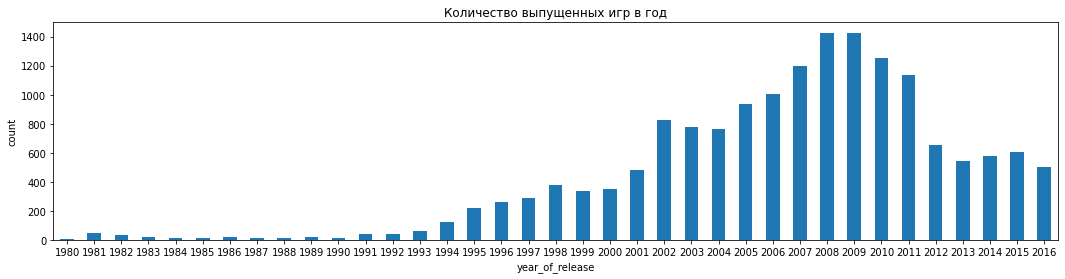

In [16]:
# построим столбчатый график, который наглядно покажет сколько игр выпускалось в разные годы.
games_per_year.plot(x='year_of_release', kind='bar', figsize=(18, 4));
plt.xticks(rotation=0);
plt.ylabel('count');
plt.title('Количество выпущенных игр в год');

Глядя на график, можем сказать что статистика до 1994 года не представляет ценности, так как количество выпущенных игр в год было менее 100. Более того, после ознакомления с данными, можно сказать что зачастую в эти годы отсутствует статистика о рейтингах пользователей, критиков и т.п. 

In [17]:
# для последующей работы оставим данные только после 1994 года
games_after_1994 = games.query('year_of_release	 >= 1994')

In [18]:
# посмотрим сколько всего уникальных платформ у нас существует
unique_platforms = len(games_after_1994['platform'].unique())
display(unique_platforms)

29

In [19]:
# выберем платформы с наибольшими суммарными продажами
platforms = games_after_1994.pivot_table(index='platform', values='full_sales', aggfunc='sum').reset_index()
platforms.columns=['platform', 'full_sales']
platforms.sort_values(by='full_sales', ascending=False)

,platform,full_sales
14,PS2,1233.56
26,X360,961.24
15,PS3,931.34
24,Wii,891.18
3,DS,802.76
13,PS,727.58
16,PS4,314.14
5,GBA,312.88
17,PSP,289.53
1,3DS,257.81


Остановимся на топ-6 платформ, потому что после 6-й можно наблюдать резкое падение продаж.

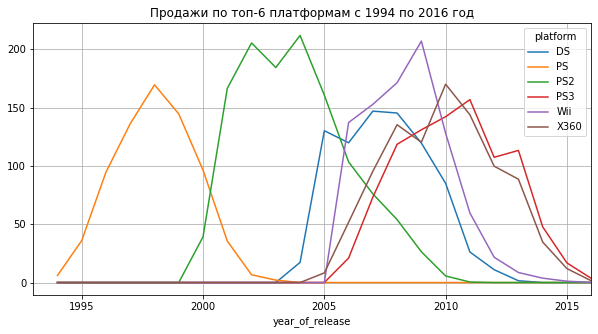

In [20]:
# посмотрим как менялись продажи по каждой из этих 6-ти платформ с 1994 по 2016 год
selected_platforms = ['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS']
 
games_platform_slice = games_after_1994.query('platform in @selected_platforms')
 
(games_platform_slice
 .pivot_table(index='year_of_release', columns='platform', values='full_sales', aggfunc='sum')
 .fillna(0)
 .plot(figsize=(10,5), grid=True, xlim=(1993,2016), title='Продажи по топ-6 платформам с 1994 по 2016 год'));

Изучив график можно заметить, что "срок годности" платформы порядка 8-10 лет. При этом пик продаж игр на платформе приходится примерно на 4-5-й год её существования. Также видно, что с 1994 по 2003 год появилось 2 новые игровые платформы (1 платформа в 4,5 года). Начиная с 2003 по 2005 год появились 4 новые платформы (2 платформы в год). Более частое появление платформ связано со стремительным развитием данной области.

Пришло время выбрать актуальный период, который поможет построить прогноз на 2017 год. Как мы писали выше данные до 1994 года не представляют ценности. Во-первых, до указанного периода в год выходило менее 100 игр. Во-вторых, за предыдущий период нет статистики по таким местрикам как: оценка критиков, пользователей и рейтинг от организации ESRB. Однако стоит помнить, что мы делаем прогноз на 2017 год, срок жизни платформы примерно 8-10 лет. Если у нас не стоит задача сделать из магазина "Стримчик" ретро лавку, то стоит брать данные начиная с 2009 года.

In [21]:
games_after_2009 = games.query('year_of_release >= 2009')
display(games_after_2009)
# исключили около 60% данных

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
...,...,...,...,...,...,...,...,...,...,...,...,...
16705,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Проанализируем какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ. Выше мы уже смотрели продажи по платформам. Выбрали топ-6. У всех них есть одна общая тенденция - продажи по ним падают. Они не войдут в список потенциально прибыльных платформ. 

In [22]:
# выберем платформы с наибольшими суммарными продажами
platforms = games_after_2009.pivot_table(index='platform', values='full_sales', aggfunc='sum').reset_index()
platforms.columns=['platform', 'full_sales']
display(platforms.sort_values(by='full_sales', ascending=False))

,platform,full_sales
4,PS3,718.67
10,X360,670.70
8,Wii,429.94
5,PS4,314.14
0,3DS,257.81
1,DS,243.29
11,XOne,159.32
2,PC,138.87
6,PSP,101.83
9,WiiU,82.19


Обратим внимание, что после среза платформ стало 12, то есть 19 фигурировали до 2009 года. Проанализируем 12 платформ за выбранный нами период (2009-2016). 

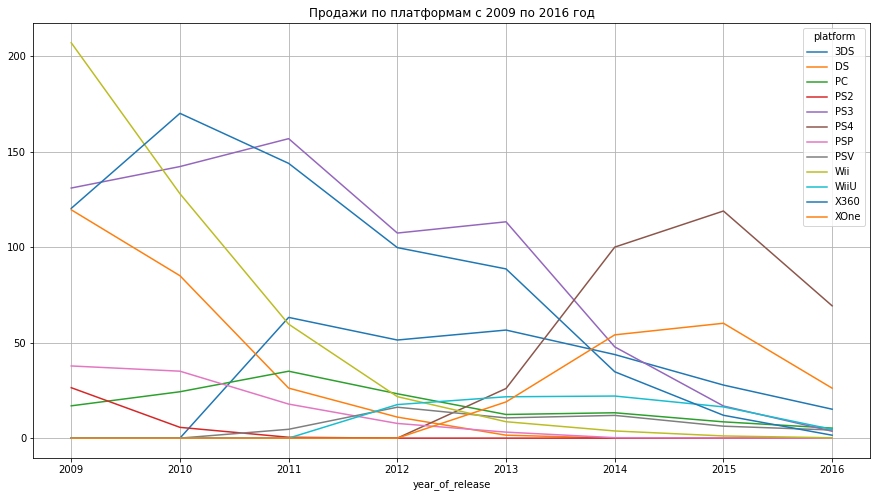

In [23]:
# посмотрим как менялись продажи по каждой из 12-ти платформ с 2009 по 2016 год
 
(games_after_2009
.pivot_table(index='year_of_release', columns='platform', values='full_sales', aggfunc='sum')
.fillna(0)
.plot(figsize=(15,8), grid=True, title='Продажи по платформам с 2009 по 2016 год'));

Глядя на график примем к рассмотрению только 6 платформ: XOne, PS4, 3DS, PC, WiiU, PSV. Продажи по всем этим платформам падают. На 2016 год продажи составили около 30 и 70 млн. долларов соответственно. Тем не менее, глядя на графики продаж других платформ, мы можем ожидать второго пика продаж. Более того, жизненный цикл этих платформ продлится и в 2017 году, на который мы делаем прогноз. Остальные платформы не будем брать к анализу, так как они уже закончили своё существование. Наша задача сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Соответственно и игры, и платформы должны быть актуальными.

**Вывод по данному подпункту.** 
- по всем платформам идёт снижение продаж
- по продажам лидируют платформы: X360, Wii, PS3, но это было в прошлом
- весь следующий анализ построим на базе 6 потенциально прибыльных платформ: XOne, PS4, 3DS, PC, WiiU, PSV

Построим графики «ящик с усами» по глобальным продажам игр в разбивке по каждой платформе за актуальный период. То есть по 6 платформам за период с 2009 по 2016 год. Опишем результат.

In [24]:
# сделаем срез по прибыльным платформам XOne, PS4, 3DS, PC, WiiU, PSV
profit_games = games_after_2009.query\
('platform == "XOne" or platform == "PS4" or platform == "3DS" or platform == "PC"\
or platform == "WiiU" or platform == "PSV"').reset_index()
profit_games.head(10)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
1,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
2,40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
3,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
4,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
5,53,Super Mario 3D Land,3DS,2011,Platform,4.89,3.00,2.14,0.78,90.0,8.4,E,10.81
6,62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90
7,73,Animal Crossing: New Leaf,3DS,2012,Simulation,2.03,2.36,4.39,0.39,88.0,8.7,E,9.17
8,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
9,85,The Sims 3,PC,2009,Simulation,0.99,6.42,0.00,0.60,86.0,7.6,T,8.01


In [25]:
profit_games['full_sales'].describe()
# с помощью метода describe() посмотрим минимальные и максимальные значения продаж

count    2313.000000
mean        0.434994
std         1.111085
min         0.010000
25%         0.030000
50%         0.100000
75%         0.340000
max        14.630000
Name: full_sales, dtype: float64

Text(0.5, 1.0, 'Глобальные продажи игр в разбивке по каждой платформе')

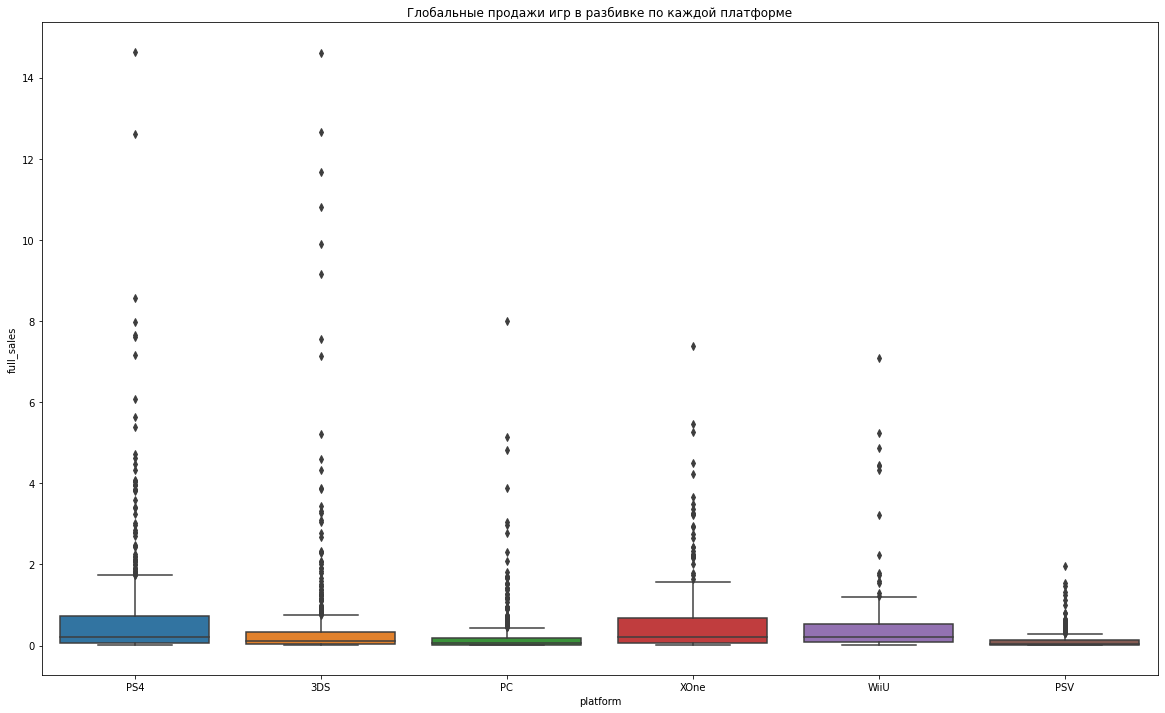

In [26]:
# построим диаграмму размаха с выбросами
plt.figure(figsize=(20, 12))
sns.boxplot(data=profit_games, x='platform', y='full_sales', showfliers=True);
plt.title('Глобальные продажи игр в разбивке по каждой платформе')

In [27]:
# всё, что выше 2-х млн. долларов можно считать выбросами, избавимся от них
profit_games_sample = profit_games.query('full_sales <= 2')

Text(0.5, 1.0, 'Глобальные продажи игр в разбивке по каждой платформе')

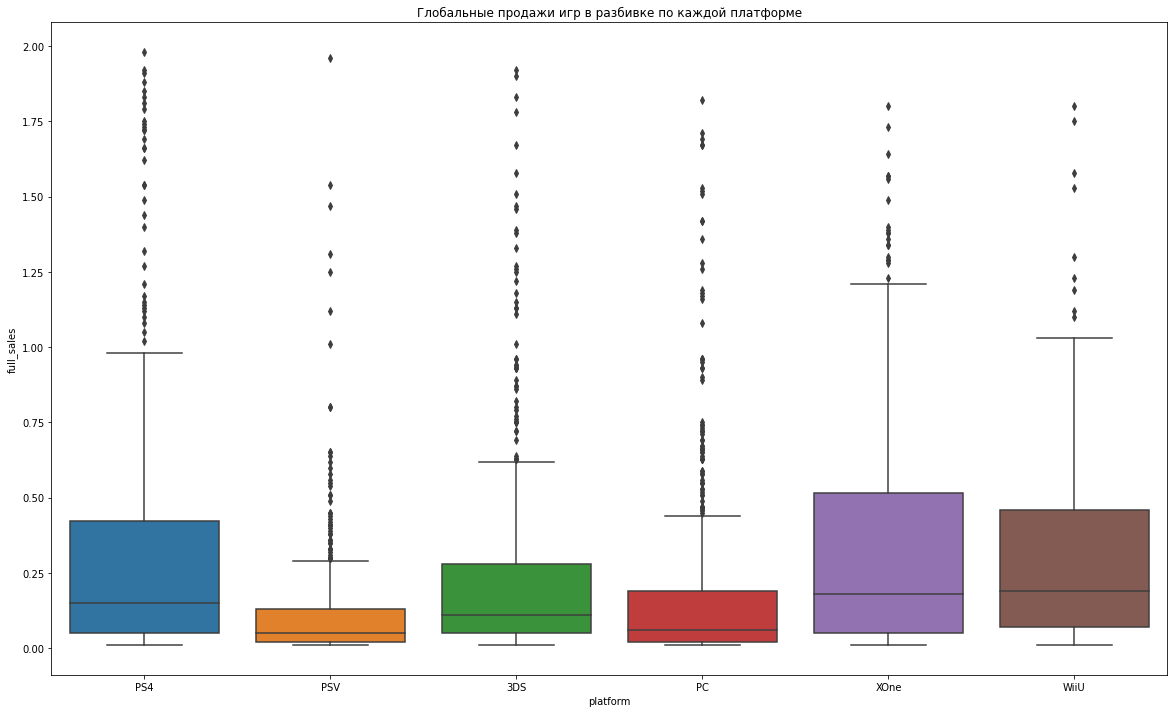

In [28]:
# построим диаграмму размаха без выбросов
plt.figure(figsize=(20, 12))
sns.boxplot(data=profit_games_sample, x='platform', y='full_sales', showfliers=True);
plt.title('Глобальные продажи игр в разбивке по каждой платформе')

Явный лидер платформа XOne, затем идёт WiiU и PS4. Нижний «ус» каждой из них упирается в значение чуть больше 0. Верхний ус XOne заканчивается около 1,2 млн. долларов - это 1.5 межквартильного размаха, добавленного к 3-му квартилю. Верхний ус WiiU заканчивается около 1 млн. долларов. Верхний ус PS4 заканчивается около 1 млн. долларов. Это ориентировочные границы нормального размаха. Всё, что лежит за ними, считается выбросами. Более высокие значения рисуются отдельными точками, но сливаются практически в единую жирную линию: таких выбросов у нас достаточно много. И всё же значения, которые отсёк верхний «ус» — редкие. Видно, что медиана не стремится к длинному хвосту высоких значений.

Аутсайдеры продаж среди этих 6-ти платформ 3DS, PC, и PSV. Верхний ус 3DS заканчивается около 0,6 млн. долларов - это 1.5 межквартильного размаха, добавленного к 3-му квартилю. Верхний ус PC заканчивается около 0,4 млн. долларов. Верхний ус PSV заканчивается около 0,3 млн. долларов. Это ориентировочные границы нормального размаха. Всё, что лежит за ними, считается выбросами. Более высокие значения рисуются отдельными точками, но сливаются практически в единую жирную линию: таких выбросов у нас достаточно много. И всё же значения, которые отсёк верхний «ус» — редкие. Видно, что медиана не стремится к длинному хвосту высоких значений.

Посмотрим как влияют на продажи отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

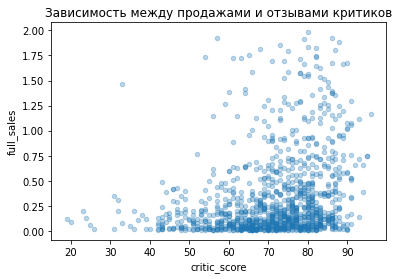

In [29]:
profit_games_sample.plot(x='critic_score', y='full_sales', kind='scatter', alpha=0.3, 
                         title='Зависимость между продажами и отзывами критиков');

In [30]:
# посчитаем коэффициент корелляции
print(profit_games['critic_score'].corr(profit_games['full_sales']))

0.30006693468240864


Коэффициент корреляции Пирсона 0,3, что свидетельствует о том, что чем выше оценка критиков, тем выше продажи. Судя по коэффециенту корреляции взаимосвязь прямая и не слишком сильная. Это объясняется тем, что на продажи игр оказывает влияние множество факторов: новые игры поначалу всегда продаются хорошо, отзывы критиков не всегда соответсвуют отзывам пользователей и т.п.

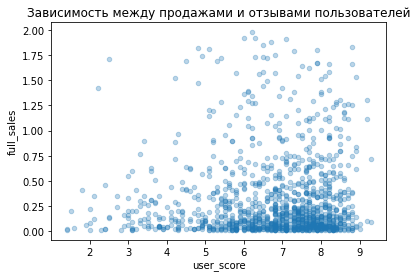

In [31]:
profit_games_sample.plot(x='user_score', y='full_sales', kind='scatter', alpha=0.3, 
                         title='Зависимость между продажами и отзывами пользователей');

In [32]:
# посчитаем коэффициент корелляции
print(profit_games['user_score'].corr(profit_games['full_sales']))

0.04333928530400721


Коэффициент корреляции Пирсона всего лишь 0,04, что свидетельствует о том, что чем выше оценка оценка пользователей, тем выше продажи. Судя по коэффециенту корреляции взаимосвязь прямая и очень слабая. Это объясняется тем, что на продажи игр оказывает влияние множество факторов: новые игры поначалу всегда продаются хорошо, даже когда ещё нет отзывов. Также на продажи оказывают влияние реламные кампании и другие маркетинговые инструменты.

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

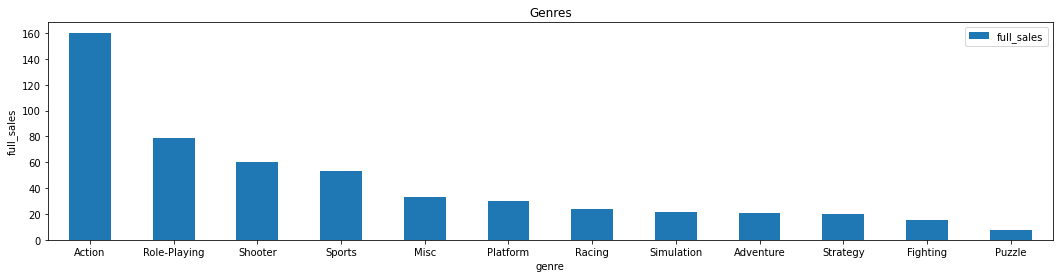

In [33]:
games_by_genre = profit_games_sample.groupby('genre')['full_sales'].sum().reset_index()
games_by_genre_sort = games_by_genre.sort_values('full_sales', ascending=False)
games_by_genre_sort.plot(x='genre', y='full_sales', kind='bar', figsize=(18, 4));
plt.xticks(rotation=0);
plt.ylabel('full_sales');
plt.title('Genres');

Самыми прибыльными жанрами являются: Action, Role-Playing и Shooter. Аутсайдеры: Puzzle, Strategy и Fighting.
Жанры как и платформы имеют жизненный цикл. Если раньше были крайне популярны игры жанра Platform, то сейчас они передали пальму первенства набирающим популярность играм жанра Sport.

### Составим портрет пользователя каждого региона <a id="step4"></a>   

In [34]:
region_platform = profit_games_sample.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum').reset_index()
region_platform.columns=['platform', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']
display(region_platform.sort_values(by='na_sales', ascending=False))

,platform,na_sales,eu_sales,jp_sales,other_sales
1,PC,64.29,0.00,27.13,12.40
2,PS4,51.11,10.45,42.26,18.14
0,3DS,26.58,48.17,37.14,5.78
5,XOne,26.32,0.18,46.99,7.19
4,WiiU,15.60,5.88,21.45,3.45
3,PSV,13.07,21.84,12.47,6.43


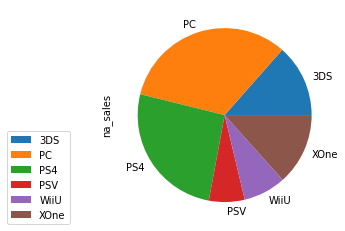

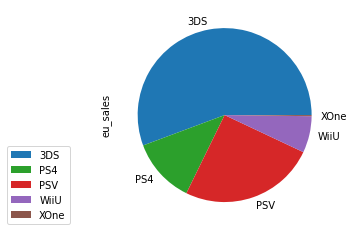

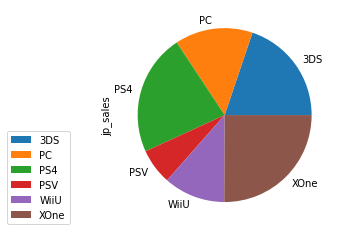

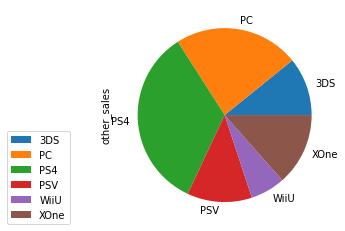

In [35]:
ax = region_platform.plot(kind ='pie', y ='na_sales', labels=region_platform['platform']);
ax.legend(loc=(-0.5,0));
ax = region_platform.plot(kind ='pie', y ='eu_sales', labels=region_platform['platform']);
ax.legend(loc=(-0.5,0));
ax = region_platform.plot(kind ='pie', y ='jp_sales', labels=region_platform['platform']);
ax.legend(loc=(-0.5,0));
ax = region_platform.plot(kind ='pie', y ='other_sales', labels=region_platform['platform']);
ax.legend(loc=(-0.5,0));

Для Северной Америки самыми популярными платформами являются: PS4 (доля продаж по ней около 40%), PC, 3DS, XOne, WiiU.

В Европе популярны только 4 платформамы: 3DS (доля продаж по ней более 60%), PS4, PC, WiiU. Продажи по XOne ничтожно малы, а по PC вообще отсутствуют.

Для Японии самыми популярными платформами являются: PS4 (доля продаж по ней около 70%), XOne, 3DS, PC, WiiU.

Для всех остальных регионов самые популярные платформамы: PS4 (доля продаж по ней около 50%), PC, XOne, 3DS, PSV.

Какие выводы можно сделать из полученных результатов: 
- во всех 4-х регионах достоточно популярны PS4, PC, 3DS; 
- при этом продажи игр на платформе PSV есть только "во всех остальных странах" - в остальных регионах эта платформа не вошла в топ-5;
- в Европе XOne не является популярной платформой.

Если наш магазин "стримчик" ориентирован на продажу игр в России, то следует присмотреться к платформам: PS4, PC, XOne, 3DS, PSV (особенно к первым четырем).

Составим сводные таблицы по каждому региону сгруппировав по жанрам. Визуализируем полученные результаты. Выберем самые популярные жанры (топ-5). Поясним разницу. Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [36]:
region_genre = profit_games_sample.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales', 
                                                                      'other_sales'], aggfunc='sum').reset_index()
region_genre.columns=['genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']
display(region_genre.sort_values(by='na_sales', ascending=False))

,genre,na_sales,eu_sales,jp_sales,other_sales
0,Action,57.31,26.80,60.14,15.94
8,Shooter,27.86,0.94,24.26,7.10
7,Role-Playing,20.67,27.07,24.65,6.36
10,Sports,19.43,4.20,23.08,6.63
6,Racing,12.77,0.55,7.60,2.81
4,Platform,12.22,2.98,11.58,3.16
9,Simulation,11.56,2.22,5.15,2.49
11,Strategy,10.70,1.59,5.42,2.11
3,Misc,8.79,10.10,11.66,2.44
1,Adventure,7.89,5.57,5.17,2.06


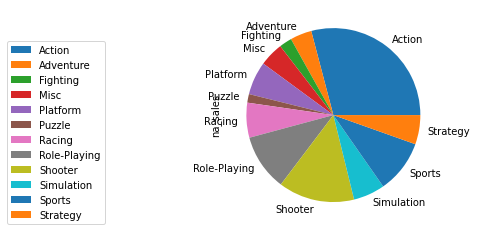

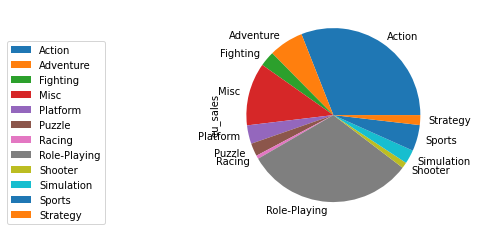

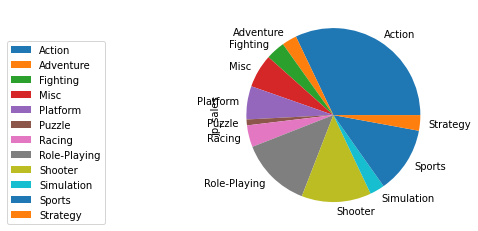

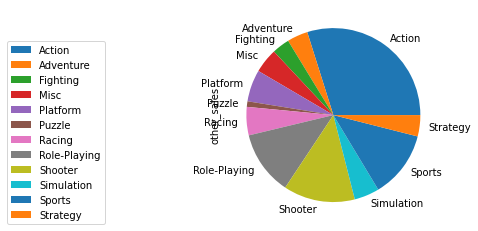

In [37]:
ax = region_genre.plot(kind ='pie', y ='na_sales', labels=region_genre['genre']);
ax.legend(loc=(-1,0));
ax = region_genre.plot(kind ='pie', y ='eu_sales', labels=region_genre['genre']);
ax.legend(loc=(-1,0));
ax = region_genre.plot(kind ='pie', y ='jp_sales', labels=region_genre['genre']);
ax.legend(loc=(-1,0));
ax = region_genre.plot(kind ='pie', y ='other_sales', labels=region_genre['genre']);
ax.legend(loc=(-1,0));

В Северной Америке и Японии самыми популярными жанрами являются action, shooter, role-playing. В Европе топ-3 тот же, но распределение другое: пальму первенства держит role-playing затем идёт action и shooter. Во всех остальных странах action, shooter и sports.
Далее 4 и 5 места в Северной Америке распределились следующим образом: sports и simulation.
В Европе: platform и simulation.
В Японии: sport и platform.
Во всех остальных странах: role-playing и platform.

Если наш магазин "стримчик" ориентирован на продажу игр в России, то следует присмотреться к жанрам: action, shooter, sports, role-playing и platform (особенно к первым четырем).

In [38]:
region_rating = profit_games_sample\
.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
             aggfunc='sum').reset_index()
region_rating.columns=['rating', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']
display(region_rating.sort_values(by='na_sales', ascending=False))

,rating,na_sales,eu_sales,jp_sales,other_sales
3,M,55.47,5.53,49.65,14.42
5,T,35.66,12.66,30.52,10.45
0,E,34.03,9.72,36.87,9.44
1,E10+,31.63,5.90,36.45,8.51
4,RP,0.03,0.00,0.00,0.01
2,EC,0.00,0.00,0.09,0.00


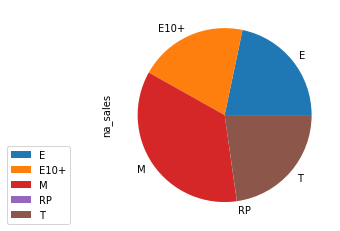

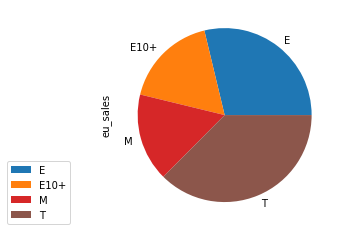

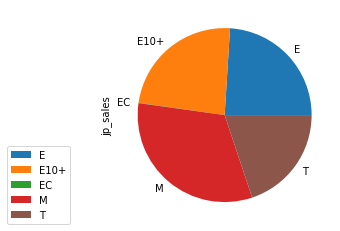

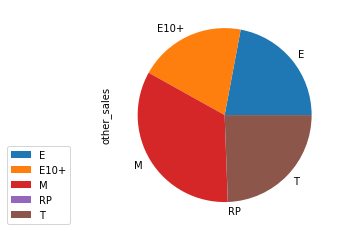

In [39]:
ax = region_rating.plot(kind ='pie', y ='na_sales', labels=region_rating['rating']);
ax.legend(loc=(-0.5,0));
ax = region_rating.plot(kind ='pie', y ='eu_sales', labels=region_rating['rating']);
ax.legend(loc=(-0.5,0));
ax = region_rating.plot(kind ='pie', y ='jp_sales', labels=region_rating['rating']);
ax.legend(loc=(-0.5,0));
ax = region_rating.plot(kind ='pie', y ='other_sales', labels=region_rating['rating']);
ax.legend(loc=(-0.5,0));

В Северной Америке, Японии и регионе "другие страны" самыми продаваемыми играми стали те, у которых рейтинг «M» («Mature») — «Для взрослых»,  «E» («Everyone») — «Для всех», «T» («Teen») — «Подросткам» и «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».

В Европе топ-4 тот же, но распределение другое: пальму первенства держит «E» («Everyone») — «Для всех», затем «T» («Teen») — «Подросткам», «M» («Mature») — «Для взрослых» и «E10+» («Everyone 10 and older»).

Стоит отметить, что по играм, имеющим рейтнг «RP» («Rating Pending») — «Рейтинг ожидается» и «EC» («Early childhood») — «Для детей младшего возраста» протажи очень низкие или вообще отсутсвуют.


Если наш магазин "стримчик" ориентирован на продажу игр в России, то следует присмотреться к тем играм, которые имеют рейтинг 
M»,  «E», «T» и «E10+».

### Проверим гипотезы <a id="step5"></a>   

Начнём с формулировки нулевой гипотезы H₀. Она всегда формулируется так, чтобы использовать знак равенства. В нашем случае она будет звучать так: "средние пользовательские рейтинги платформ Xbox One и PC равны". Исходя из H₀ сформулируем альтернативную гипотезу H₁, которая будет звучать так: "средние пользовательские рейтинги платформ Xbox One и PC различаются".

Необходимо выбрать значение alpha. Чаще всего используют значения 0.05, 0.01, 0.005. Чем меньше значение, тем точнее результат. Остановимся на значении 0.05. Оно ограничивает частоту ошибок первого рода, то есть ошибки, когда мы отвергнули нулевую гипотезу, а она была верна. В случае, если значение 0.05, то вероятность отвергуть нулевую гипотезу, когда она была верна = 5/100 = 1/20.

В данном случае нам необходимо сопоставить среднее двух генеральных совокупностей. Без проведения корректного теста нельзя считать отличия случайными или разницу достаточной, чтобы полагать суммы разными. Вместо расчёта и сравнения самих средних, используем эти датасеты для проведения статистического теста. Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind (array1, array2).

In [40]:
# из объединной таблицы выведем 2 таблицы, в зависимости от платформы.
Xbox_One_platform = profit_games_sample[profit_games_sample['platform']=='XOne']
PC_platform = profit_games_sample[profit_games_sample['platform']=='PC']
display(Xbox_One_platform.head(10))
display(PC_platform.head(10))

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
123,975,Forza Motorsport 6,XOne,2015,Racing,0.73,0.90,0.03,0.14,87.0,7.9,E,1.80
133,1037,NBA 2K15,XOne,2014,Sports,1.37,0.18,0.00,0.18,82.0,6.3,E,1.73
142,1125,Far Cry 4,XOne,2014,Shooter,0.80,0.69,0.01,0.14,82.0,7.5,M,1.64
146,1176,Dead Rising 3,XOne,2013,Action,1.06,0.35,0.01,0.15,78.0,6.8,M,1.57
147,1180,Watch Dogs,XOne,2014,Action,0.90,0.53,0.00,0.14,78.0,5.8,M,1.57
148,1183,Madden NFL 15,XOne,2014,Sports,1.31,0.09,0.00,0.16,80.0,6.4,E,1.56
157,1274,Batman: Arkham Knight,XOne,2015,Action,0.88,0.47,0.00,0.14,85.0,6.6,M,1.49
166,1386,Forza Horizon 2,XOne,2014,Racing,0.50,0.78,0.01,0.11,86.0,8.2,E10+,1.40
169,1400,Ryse: Son of Rome,XOne,2013,Action,0.83,0.43,0.00,0.13,60.0,6.1,M,1.39
170,1401,Mortal Kombat X,XOne,2015,Fighting,1.03,0.21,0.00,0.14,86.0,7.3,M,1.38


,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
121,959,World of Warcraft: Mists of Pandaria,PC,2012,Role-Playing,0.84,0.76,0.0,0.22,82.0,4.8,T,1.82
134,1040,Call of Duty: Modern Warfare 3,PC,2011,Shooter,0.41,0.98,0.0,0.32,78.0,2.5,M,1.71
135,1055,The Sims 3: Late Night Expansion Pack,PC,2010,Simulation,0.59,0.87,0.0,0.23,74.0,5.3,T,1.69
137,1078,Sid Meier's Civilization V,PC,2010,Strategy,0.98,0.52,0.0,0.17,90.0,7.9,E10+,1.67
139,1095,StarCraft II: Heart of the Swarm,PC,2013,Strategy,0.83,0.66,0.0,0.18,86.0,7.9,T,1.67
152,1227,Call of Duty: Black Ops II,PC,2012,Shooter,0.64,0.69,0.0,0.19,74.0,4.2,M,1.52
154,1236,Final Fantasy XIV: A Realm Reborn,PC,2010,Role-Playing,0.88,0.48,0.0,0.17,NaN,NaN,NaN,1.53
156,1252,Football Manager 2012,PC,2011,Sports,0.02,1.16,0.0,0.33,84.0,8.0,E,1.51
163,1344,Anno 2070,PC,2011,Strategy,0.00,1.13,0.0,0.29,83.0,7.0,T,1.42
164,1351,SimCity (2013),PC,2013,Simulation,0.48,0.77,0.0,0.17,64.0,2.2,E10+,1.42


In [41]:
user_score_Xbox_One = Xbox_One_platform['user_score']

user_score_PC = PC_platform['user_score']

alpha = .05 

results = st.ttest_ind(
    user_score_Xbox_One, 
    user_score_PC, nan_policy="omit") # проверяем гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue) 

if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6188049044751449
Не получилось отвергнуть нулевую гипотезу


В данном случае мы не смогли отвергнуть нулевую гипотезу, которая звучит как "средние пользовательские рейтинги платформ Xbox One и PC равны". Сооветственно, мы отвергли альтернативную гипотезу о том что "средние пользовательские рейтинги платформ Xbox One и PC различаются".

На гистограмме на базе платформы Xbox One мы видим пиковое значение от 6,1 до 6,8 баллов, а затем большое количество значений от 5,5 до 6,1 и от 6,8 до 8,2. График не имеет скошенности, что свидетельствует об относительно нормальном распределении.

На гистограмме на базе платформы РС мы видим пиковое значение от 7,8 до 8,3 баллов, а затем большое количество значений от 7 до 7,8 и от 6,1 до 7. Графика скошен влево, что свидетельствует о "хвосте" из низких оценок. Также мы видим, что оценок платформы РС практически в 2 раза больше.

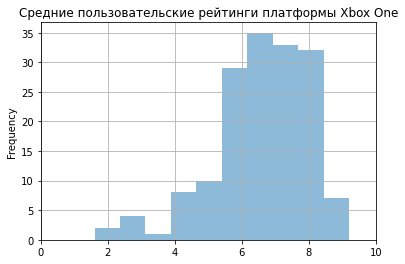

In [42]:
user_score_Xbox_One.plot(kind='hist', y='user_score', 
                         title='Cредние пользовательские рейтинги платформы Xbox One', bins=10, grid=True, 
                         alpha=0.5, xlim=(0, 10));

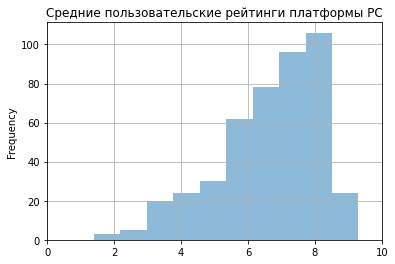

In [43]:
user_score_PC.plot(kind='hist', y='user_score', title='Cредние пользовательские рейтинги платформы РС', 
                   bins=10, grid=True, alpha=0.5, xlim=(0, 10));

Начнём с формулировки нулевой гипотезы H₀. Она всегда формулируется так, чтобы использовать знак равенства. В нашем случае она будет звучать так: "средние пользовательские рейтинги жанров Action и Sports равны". Исходя из H₀ сформулируем альтернативную гипотезу H₁, которая будет звучать так: "средние пользовательские рейтинги жанров Action и Sports разные".

В данном случае нам необходимо сопоставить среднее двух генеральных совокупностей. Без проведения корректного теста нельзя считать отличия случайными или разницу достаточной, чтобы полагать суммы разными. Вместо расчёта и сравнения самих средних, используем эти датасеты для проведения статистического теста. Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind (array1, array2).

In [44]:
# из объединной таблицы выведем 2 таблицы, в зависимости от жанра.
action_genre = profit_games_sample[profit_games_sample['genre']=='Action']
sports_genre = profit_games_sample[profit_games_sample['genre']=='Sports']
display(action_genre.head(10))
display(sports_genre.head(10))

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
118,938,Just Cause 3,PS4,2015,Action,0.47,1.03,0.07,0.28,73.0,6.5,M,1.85
122,968,Mafia III,PS4,2016,Action,0.42,1.08,0.03,0.28,68.0,5.1,M,1.81
124,976,The Evil Within,PS4,2014,Action,0.55,0.86,0.11,0.27,75.0,7.3,M,1.79
125,978,The Legend of Zelda: The Wind Waker,WiiU,2013,Action,0.92,0.60,0.14,0.14,NaN,NaN,NaN,1.80
136,1056,No Man's Sky,PS4,2016,Action,0.63,0.76,0.03,0.27,71.0,4.5,T,1.69
143,1139,LEGO Marvel Super Heroes,PS4,2013,Action,0.59,0.76,0.01,0.26,83.0,7.7,E10+,1.62
144,1168,Kingdom Hearts 3D: Dream Drop Distance,3DS,2012,Action,0.88,0.26,0.34,0.10,75.0,8.2,E10+,1.58
146,1176,Dead Rising 3,XOne,2013,Action,1.06,0.35,0.01,0.15,78.0,6.8,M,1.57
147,1180,Watch Dogs,XOne,2014,Action,0.90,0.53,0.00,0.14,78.0,5.8,M,1.57
157,1274,Batman: Arkham Knight,XOne,2015,Action,0.88,0.47,0.00,0.14,85.0,6.6,M,1.49


,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,full_sales
117,921,NBA 2K17,PS4,2016,Sports,1.25,0.27,0.02,0.34,88.0,6.7,E,1.88
127,1007,Madden NFL 17,PS4,2016,Sports,1.25,0.17,0.00,0.32,82.0,4.9,E,1.74
133,1037,NBA 2K15,XOne,2014,Sports,1.37,0.18,0.00,0.18,82.0,6.3,E,1.73
148,1183,Madden NFL 15,XOne,2014,Sports,1.31,0.09,0.00,0.16,80.0,6.4,E,1.56
156,1252,Football Manager 2012,PC,2011,Sports,0.02,1.16,0.00,0.33,84.0,8.0,E,1.51
162,1325,NBA 2K14,PS4,2013,Sports,0.89,0.31,0.01,0.23,85.0,6.5,E,1.44
188,1574,Football Manager 2011,PC,2010,Sports,0.00,1.01,0.00,0.25,85.0,8.4,E,1.26
191,1615,Madden NFL 17,XOne,2016,Sports,1.08,0.02,0.00,0.13,83.0,5.9,E,1.23
194,1658,WWE 2K16,PS4,2015,Sports,0.41,0.60,0.00,0.20,73.0,7.4,T,1.21
199,1708,Mario & Sonic at the London 2012 Olympic Games,3DS,2012,Sports,0.18,0.64,0.27,0.09,NaN,NaN,NaN,1.18


In [45]:
user_score_action = action_genre['user_score']

user_score_sports = sports_genre['user_score']

alpha = .05 

results = st.ttest_ind(
    user_score_action, 
    user_score_sports, nan_policy="omit") # проверяем гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue) 

if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.111663254304015e-11
Отвергаем нулевую гипотезу


В данном случае мы смогли отвергнуть нулевую гипотезу, которая звучит как "средние пользовательские рейтинги жанров Action и Sports равны". Сооветственно, мы не смогли отвергнуть альтернативную гипотезу о том что "средние пользовательские рейтинги жанров Action и Sports различаются".

На гистограмме на базе жанра Action мы видим пиковое значение от 7,7 до 8,1 баллов, а затем большое количество значений от 6,1 до 7,7. График скошен влево, что свидетельствует о "хвосте" из низких оценок.

На гистограмме на базе жанра Sports мы видим пиковое значение от 6 до 6,8 баллов, а затем большое количество значений от 5,2 до 6 и от 6,8 до 7,2. График не имеет ярко выраженной скошенности, что свидетельствует об относительно нормальном распределении. Также мы видим, что оценок жанра Action в 4 раза больше.

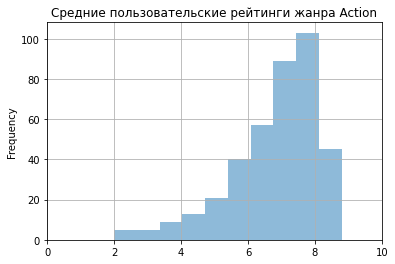

In [46]:
user_score_action.plot(kind='hist', y='user_score', title='Cредние пользовательские рейтинги жанра Action', 
                       bins=10, grid=True, alpha=0.5, xlim=(0, 10));

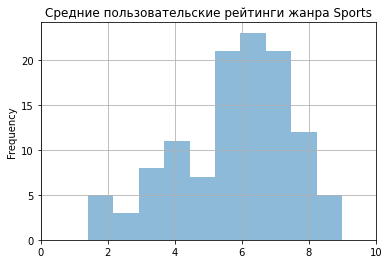

In [47]:
user_score_sports.plot(kind='hist', y='user_score', title='Cредние пользовательские рейтинги жанра Sports', 
                       bins=10, grid=True, alpha=0.5, xlim=(0, 10));

### Общий вывод <a id="step6"></a>   

**Краткий обзор проведённой работы.** 
Привели названия столбцов к нижнему регистру. В столбце год выпуска заменили вещественный тип данных на целочисленный, в столбце с оценкой пользователей привели строковый тип данных к вещественному. Определили "срок жизни платформ" и определили актуальный период для анализа. Выберите топ-6 потенциально прибыльных платформ. Выяснили, что сильной корреляции между продажами и отзывами пользователей и критиков нет. Выяснили какие жанры являются самыми прибыльными. Составили портрет пользователя каждого региона. Не смогли отвергнуть нулевую гипотезу о том, что "средние пользовательские рейтинги платформ Xbox One и PC одинаковые" и не смогли отвергнуть альтернативеную гипотезу о том, что "средние пользовательские рейтинги жанров Action и Sports различаются".

**Главные выводы.** 
Основной задачей данного проекта являлось выявить определяющие успешность игры закономерности. Цель - сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год. Судя по заданию магазин "Стримчик" ориентирован на российского потребителя.
1. Необходимо приобретать игры только для следующих платформ (регон продаж "другие страны"): PS4 (около 50% продаж), PC, XOne и 3DS (по 15% продаж), PSV (6% продаж).
2. Жанры для продажи целесообразно приобретать следующие: action, shooter (первые 2 жанра закрывают 50% продаж), sports, role-playing (вторые 2 жанра 30%) и platform (около 4%).
3. Есть связь между рейтингом от организации ESRB и продажами. Самыми продаваемыми играми стали те, у которых рейтинг «M» («Mature») — «Для взрослых», «E» («Everyone») — «Для всех», «T» («Teen») — «Подросткам» и «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».
4. При закупе игр не нужно опираться на отзывы критиков, особенно покупателей. Корреляция между продажами и отзывами критиков достаточно слабая, а между продажами и отзывами пользователей практически отсутствует.
5. Выяснили продолжительность жизни игровых платформ - от 8 до 10 лет. Обратим внимание, что на конец 2016 года нет платформ, по которым бы наблюдался рост продаж. Это даёт возможность предположить, что в скором времени ожидается выход новой платформы и при формировании бюджетов на грядущий год стоит принять это во внимание и заложить резервные фонды.

**Рекомендации.** 
Разумно будет хранить данные по отжившим своё платформам в отдельном датасете, дабы исключить дополнительные затраты времени на предобработку данных, а также снизить вероятность искажения общих данных информацией об этих платформах.